# Cifar10 Classifier
Cifar10 is a dataset with 10 classes containing 6000 images for each class. In this notebook, you will learn how to perform Data Augmentation to prevent Overfitting.

# Import Libraries

## Install Tensorflow 2

In [0]:
!pip install tensorflow-gpu -q

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 450kB 47.0MB/s 
     |████████████████████████████████| 3.9MB 54.5MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.


In [0]:
import tensorflow as tf

tf.__version__

'2.1.0'

## Import other libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical

np.set_printoptions(precision=7)
np.random.seed(42)
%matplotlib inline

# Cifar10 Tensorflow Dataset

In this tutorial, we are using cifar10 data from Tensorflow dataset, you can see the details here https://www.tensorflow.org/datasets/catalog/cifar10

## Create directory for dataset

In [0]:
import os

data_dir = 'dataset'

if not os.path.exists(data_dir):
  os.mkdir(data_dir)

## Download Cifar10 dataset

In [0]:
dataset_name = 'cifar10'

(train_set, test_set), dataset_info =  tfds.load( 
              name = dataset_name, 
              split = ['train', 'test'], 
              with_info = True, 
              data_dir = data_dir
          )

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to dataset/cifar10/3.0.0.incompleteCH428G/cifar10-train.tfrecord


Shuffling and writing examples to dataset/cifar10/3.0.0.incompleteCH428G/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to dataset/cifar10/3.0.0. Subsequent calls will reuse this data.


## Dataset Information

In [0]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.0,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



## Detailed Information

In [0]:
class_names =  dataset_info.features["label"].names

print('image shape    :', dataset_info.features['image'].shape)
print('image dtype    :', dataset_info.features['image'].dtype)
print()
print('num class      : ',dataset_info.features["label"].num_classes)
print('class label    :', dataset_info.features["label"].names)
print()
print('num train data :', dataset_info.splits["train"].num_examples)

image shape    : (32, 32, 3)
image dtype    : <dtype: 'uint8'>

num class      :  10
class label    : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num train data : 50000


## Show Images

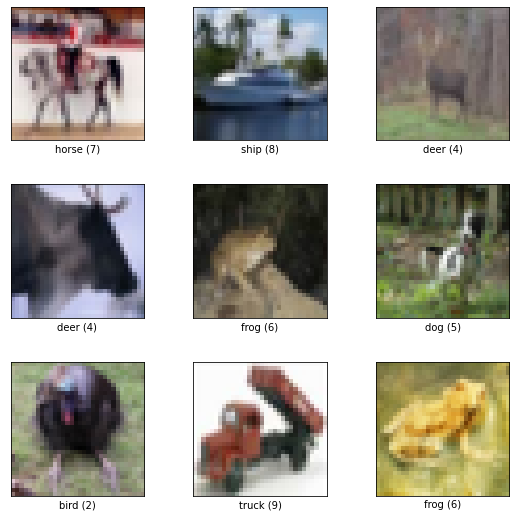

In [0]:
fig = tfds.show_examples(dataset_info, train_set)

Since Cifar10 has the same size for each image, so we don't need to resize the images. All we have to do is convert image type as numpy array and normalize every pixel.

# Preprocess Image

## Convert Image Type

In [0]:
X_train_ori = []
y_train_ori = []

X_test_ori = []
y_test_ori = []

for example in tfds.as_numpy(train_set):
    new_img = example['image']
    X_train_ori.append(new_img)
    y_train_ori.append(example['label'])
del train_set

for example in tfds.as_numpy(test_set):
    new_img = example['image']
    X_test_ori.append(new_img)
    y_test_ori.append(example['label'])
del test_set

# Convert train data to numpy array
X_train_ori = np.asarray(X_train_ori)
y_train_ori = np.asarray(y_train_ori)

# Convert test data to numpy array
X_test_ori = np.asarray(X_test_ori)
y_test_ori = np.asarray(y_test_ori)

# One hot label
y_train_hot = to_categorical(y_train_ori)
y_test_hot = to_categorical(y_test_ori)

## Normalize Data

In [0]:
mean_pixel = X_train_ori.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = X_train_ori.std(axis=(0, 1, 2), keepdims=True)

X_train = ((X_train_ori - mean_pixel) / std_pixel).astype('float32')

X_test = ((X_test_ori - mean_pixel) / std_pixel).astype('float32')

# Split Train Data into Train and Val

In [0]:
# Set the length of Train data
dataset_size = len(X_train)
train_idx = int(0.8 * dataset_size)

# Split for val data
X_val = X_train[train_idx:, :]
y_val_hot = y_train_hot[train_idx:]

# Split for train data
X_train = X_train[:train_idx, :]
y_train_hot = y_train_hot[:train_idx]

print('X_train.shape =', X_train.shape)
print('X_val.shape =', X_val.shape)
print('X_test.shape =', X_test.shape)

print('y_train.shape =', y_train_hot.shape)
print('y_val.shape =', y_val_hot.shape)
print('y_test.shape =', y_test_hot.shape)

X_train.shape = (40000, 32, 32, 3)
X_val.shape = (10000, 32, 32, 3)
X_test.shape = (10000, 32, 32, 3)
y_train.shape = (40000, 10)
y_val.shape = (10000, 10)
y_test.shape = (10000, 10)


In [0]:
model1 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=256, activation='relu'),    
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         2

In [0]:
history = []

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

his = model1.fit(X_train, y_train_hot, batch_size=64, epochs=20, validation_data=(X_val, y_val_hot))
history.append(his)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 20s 511us/sample - loss: 1.7369 - accuracy: 0.3275 - val_loss: 1.3346 - val_accuracy: 0.5033
Epoch 2/20
40000/40000 [==============================] - 13s 337us/sample - loss: 1.2041 - accuracy: 0.5687 - val_loss: 1.0096 - val_accuracy: 0.6388
Epoch 3/20
40000/40000 [==============================] - 13s 335us/sample - loss: 0.9628 - accuracy: 0.6690 - val_loss: 0.8939 - val_accuracy: 0.6918
Epoch 4/20
40000/40000 [==============================] - 13s 335us/sample - loss: 0.8218 - accuracy: 0.7195 - val_loss: 0.8524 - val_accuracy: 0.7105
Epoch 5/20
40000/40000 [==============================] - 13s 335us/sample - loss: 0.7278 - accuracy: 0.7521 - val_loss: 0.7573 - val_accuracy: 0.7382
Epoch 6/20
40000/40000 [==============================] - 13s 336us/sample - loss: 0.6411 - accuracy: 0.7831 - val_loss: 0.7265 - val_accuracy: 0.7539
Epoch 7/20
40000/40000 [====================

We have used the Dropout in the network, but why it is still <font color = 'red'>overfitting</font>?

Yes, because the <font color = 'blue'>deeper the network</font> is, it will learn more and it is possible to be overfitted because of the <font color = 'blue'>big capacity to learn</font>. The deep network that we are building now <font color = 'red'>needs more datasets</font> so that our network will learn with more variety of data. So, we must increase the number of datasets.

Let's do <font color = 'blue'>Data Augmentation</font>.

In [0]:
data_gen_args = dict(
    rotation_range=0,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64

datagen = ImageDataGenerator(**data_gen_args)
datagen.fit(X_train)
augmented_train = datagen.flow(
    X_train, y_train_hot, batch_size
)

Luckily Tensorflow has an Image Data Generator API for data augmentation and if you want to know more you can check it here https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [0]:
model2 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=256, activation='relu'),    
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 256)        

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

his = model2.fit_generator(augmented_train, validation_data = (X_val, y_val_hot), epochs=20)

history.append(his)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 625 steps, validate on 10000 samples
Epoch 1/20
625/625 [==============================] - 24s 39ms/step - loss: 1.7695 - accuracy: 0.3128 - val_loss: 1.3307 - val_accuracy: 0.4970
Epoch 2/20
625/625 [==============================] - 24s 38ms/step - loss: 1.3345 - accuracy: 0.5138 - val_loss: 1.0915 - val_accuracy: 0.6038
Epoch 3/20
625/625 [==============================] - 24s 38ms/step - loss: 1.1121 - accuracy: 0.6111 - val_loss: 0.9819 - val_accuracy: 0.6519
Epoch 4/20
625/625 [==============================] - 24s 38ms/step - loss: 0.9957 - accuracy: 0.6587 - val_loss: 0.8461 - val_accuracy: 0.7015
Epoch 5/20
625/625 [==============================] - 24s 38ms/step - loss: 0.9042 - accuracy: 0.6902 - val_loss: 0.7985 - val_accuracy: 0.7200
Epoch 6/20
625/625 [==============================] - 24s 38ms/step - loss: 0.8525 - accuracy: 0.7157 - val_loss: 0.7938 - val_accuracy: 0.7232
Epoch 7/20
625/625 [==============================] - 24s 38ms/step - loss: 0.8218 - accu

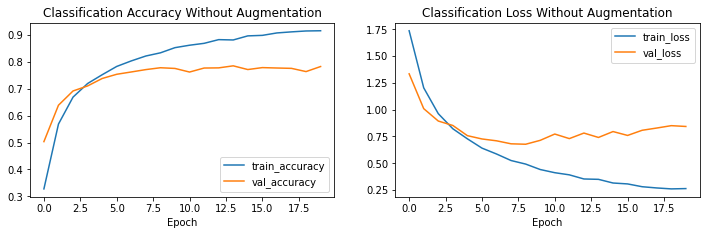

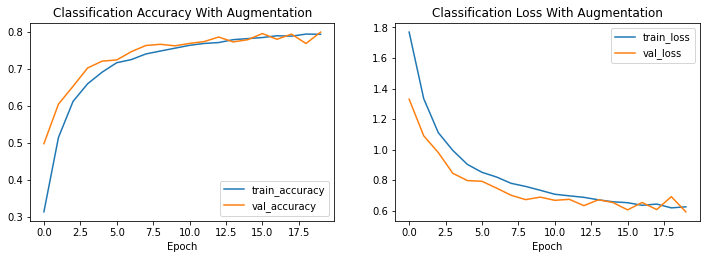

In [0]:
model_name = ["Without Augmentation", "With Augmentation"]

plt.rcParams['figure.figsize'] = [12, 8]
plt.subplots_adjust(wspace=0.2, hspace=0.5)

for i, name in enumerate(model_name):
  plt.subplot(2, 2, i*2+1)
  plt.plot(history[i].history['accuracy'], label='train_accuracy')
  plt.plot(history[i].history['val_accuracy'], label='val_accuracy')
  plt.title("Classification Accuracy " + model_name[i])
  plt.xlabel('Epoch')
  plt.legend()

  plt.subplot(2, 2, i*2+2)
  plt.plot(history[i].history['loss'], label='train_loss')
  plt.plot(history[i].history['val_loss'], label='val_loss')
  plt.title("Classification Loss " + model_name[i])
  plt.xlabel('Epoch')
  plt.legend()
  
  plt.show()

# Evaluate Model

## Model Performance without Data Augmentation

In [0]:
train_scores = model1.evaluate(X_train, y_train_hot, batch_size=16, verbose=1)
test_scores  = model1.evaluate(X_test, y_test_hot, batch_size=16, verbose=1)
val_scores   = model1.evaluate(X_val, y_val_hot, batch_size=16, verbose=1)

print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

10000/10000 [==============================] - 3s 253us/sample - loss: 0.8432 - accuracy: 0.7827
Train Loss: 0.16146 with Accuracy: 94.9%
Test  Loss: 0.88306 with Accuracy: 77.7%
Val   Loss: 0.84317 with Accuracy: 78.3%


## Model Performance with Data Augmentation

In [0]:
train_scores = model2.evaluate(X_train, y_train_hot, batch_size=16, verbose=1)
test_scores  = model2.evaluate(X_test, y_test_hot, batch_size=16, verbose=1)
val_scores   = model2.evaluate(X_val, y_val_hot, batch_size=16, verbose=1)

print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

10000/10000 [==============================] - 3s 252us/sample - loss: 0.5941 - accuracy: 0.7984
Train Loss: 0.48176 with Accuracy: 83.2%
Test  Loss: 0.62495 with Accuracy: 79.5%
Val   Loss: 0.59415 with Accuracy: 79.8%


As we can see, the trained model <font color = 'red'>without Data Augmentation is overfitting</font>, and the model that are trained with <font color = 'blue'>augmented data can handle overfitting</font>. How could <font color = 'blue'>Data Augmentation</font> can handle <font color = 'red'>Overfitting</font>? See the explanation below.

# Data Augmentation

For example, let's say we have a dataset consisting of two classes (cat and lion)

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/2%20Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image1.PNG" width='600'>
</p>

Based on the dataset, our model will learn to <font color = 'red'>recognize object through the body poses</font>. The model we trained will recognize that objects with <font color = 'blue'>sitting pose with the hands down and the head on the top is a cat</font> and objects with <font color = 'blue'>only head that is covered more of the picture is a Lion</font>, <font color = 'red'>without recognizing the details</font> of all parts of their body. Let's see what is the problem if we train the model like that.

## What's the problem?

Let's say we test the model that we have trained using this picture.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/2%20Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image2.PNG" width='250'>
</p>

Human can easily say that this picture is a <font color = 'blue'>Cat</font>. But the prediction of the model we have trained will see it as a <font color = 'red'>Lion</font> based on the datasets we used when we were training our model.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/2%20Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image3.PNG" width='600'>
</p>

## What should we do?

Absolutely, <font color = 'blue'>Data Augmentation</font>. Let's see how does it works!

For instance, in this case we can do <font color = 'blue'>random cropping</font> so that our model can <font color = 'blue'>learn the detail</font> of the object.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/2%20Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image4.PNG" width='600'><br>
<b>Random Croping</b>
</p>

With random cropping, our model will learn that Cats have nose, ears, and eyes that are different with Lions. So, our model is <font color = 'red'>not recognize those objects by their pose</font> anymore, but it will <font color = 'blue'>learn from the detail of those objects</font>.

<p align=center>
<img src="https://raw.githubusercontent.com/Malikanhar/Deep-Learning-for-Image-Classification/master/2%20Data%20Augmentation%20to%20Prevent%20Overfitting/Images/Image5.PNG" width='600'>
</p>


<font color = 'blue'>Easy</font> to understand, right?

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/malikanhar/>2019 - MALIK</a> </p>